In [ ]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import mode

In [ ]:
df = pd.read_csv('/content/customer_shopping_data.csv')

In [ ]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


In [ ]:
df = df.drop_duplicates()

In [ ]:
mean_price = df['price'].mean()
median_price = df['price'].median()

std_dev_price = df['price'].std()

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")

print(f"Standard Deviation of Price: {std_dev_price}")

Mean Price: 689.2563209226097
Median Price: 203.3
Standard Deviation of Price: 941.184567215467


In [ ]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df.set_index('invoice_date', inplace=True)

<ipython-input-12-d2e721c8c9ab>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['invoice_date'] = pd.to_datetime(df['invoice_date'])


In [ ]:
monthly_sales = df['quantity'].resample('M').sum()

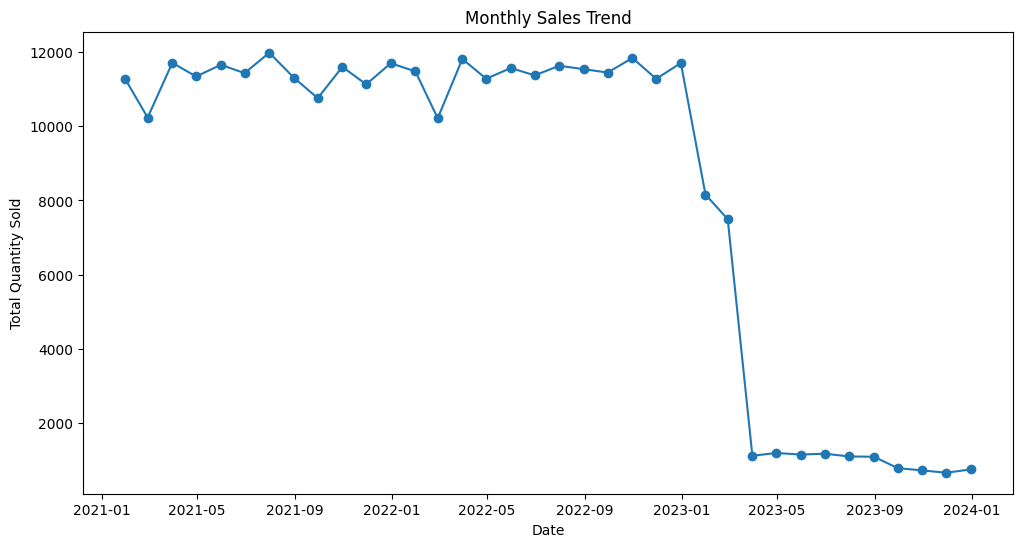

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.show()

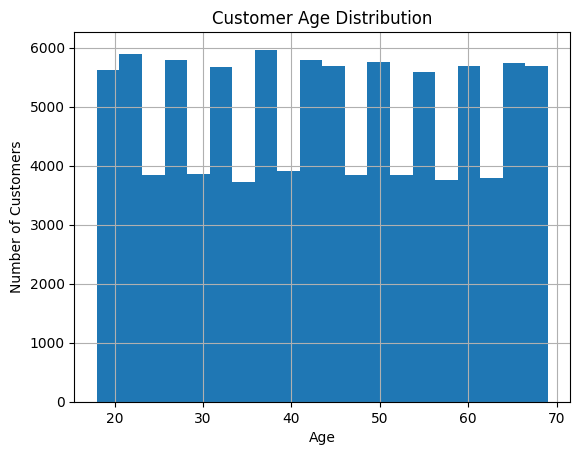

In [ ]:
customer_age_distribution = df['age'].hist(bins=20)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

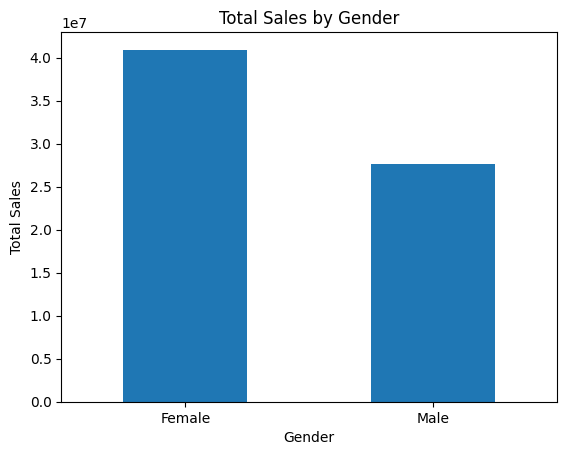

In [ ]:
gender_purchases = df.groupby('gender')['price'].sum()
gender_purchases.plot(kind='bar', rot=0)
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()

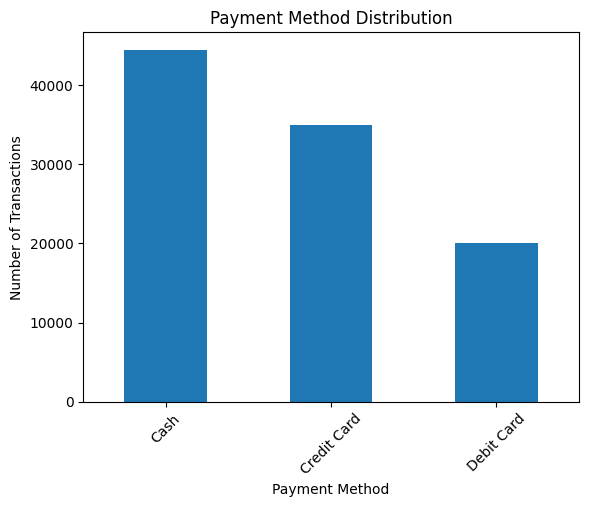

In [ ]:
payment_method_distribution = df['payment_method'].value_counts()
payment_method_distribution.plot(kind='bar', rot=45)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()

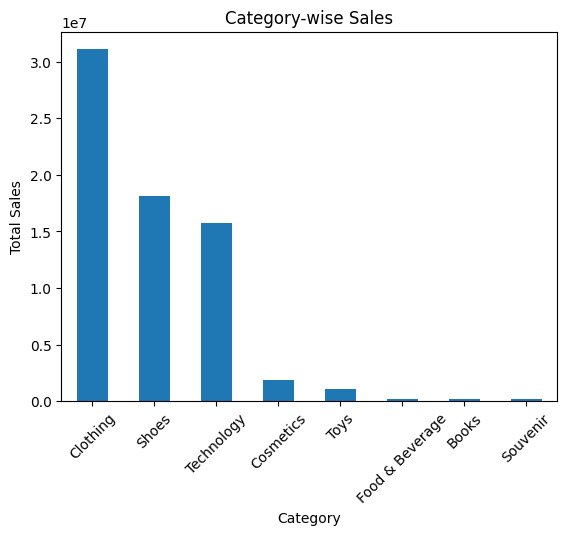

In [ ]:
category_wise_sales = df.groupby('category')['price'].sum().sort_values(ascending=False)
category_wise_sales.plot(kind='bar', rot=45)
plt.title('Category-wise Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

<ipython-input-20-d4d40298de7a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


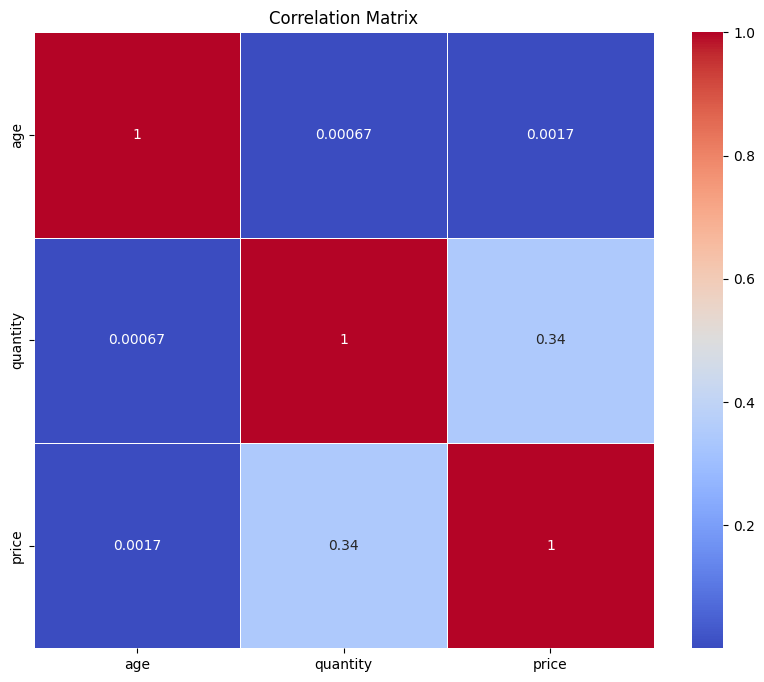

In [ ]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()